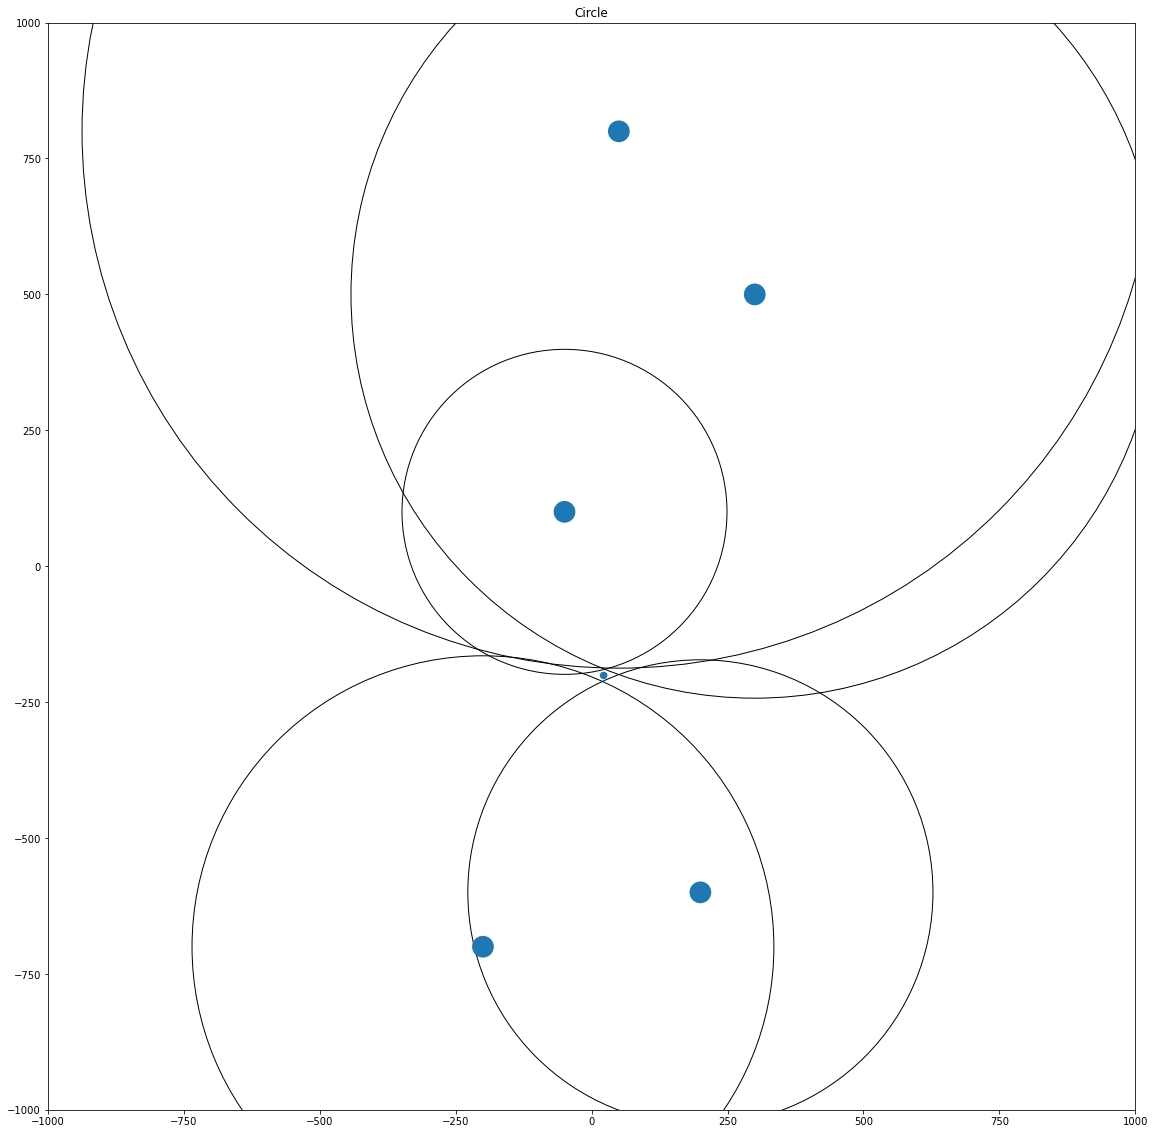

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv, det
import numpy as np
from scipy.optimize import least_squares

cords = np.array([(-50, 100), (300, 500), (-200, -700), (200, -600), (50, 800)])
dist = np.array([298.9468,742.7760,535.1911,427.8247,987.5056])

f, axes = plt.subplots()
f.set_figwidth(20)
f.set_figheight(20)

plt.title( 'Circle' )
plt.xlim(-1000 , 1000 )
plt.ylim(-1000 , 1000 )

cir_1 = plt.Circle((-50., 100.),298.9468,fill = False )
cir_2 = plt.Circle((300., 500.),742.7760,fill = False )
cir_3 = plt.Circle((-200., -700.),535.1911,fill = False )
cir_4 = plt.Circle((200., -600.),427.8247,fill = False )
cir_5 = plt.Circle((50., 800.),987.5056,fill = False )

 
axes.set_aspect(1)
axes.add_artist(cir_1)
axes.add_artist(cir_2)
axes.add_artist(cir_3)
axes.add_artist(cir_4)
axes.add_artist(cir_5)



axes.add_artist(plt.Circle((-50., 100.), 20))
axes.add_artist(plt.Circle((300., 500.), 20))
axes.add_artist(plt.Circle((-200., -700.), 20))
axes.add_artist(plt.Circle((200., -600.), 20))
axes.add_artist(plt.Circle((50., 800.), 20))
axes.add_artist(plt.Circle((22., -201.), 7))
plt.show()



# Наш гениальный математичный кодик

In [89]:
def coords(x0,y0,tau,dist=np.array([298.9468,742.7760,535.1911,427.8247,987.5056]),cords=cords):
    t=len(dist)
    noise = np.random.normal(0,1,t)
    z,H = np.array([]),np.array([[]])

    for i in range(t):
        z=np.append(z,(dist[i]-(np.sqrt((cords[i][0]-x0)**2+(cords[i][1]-y0)**2))))
    z=np.array(z)+ noise #+ noise
    for i in range(t):
        dfx = (x0-cords[i][0])/(np.sqrt((cords[i][0]-x0)**2+(cords[i][1]-y0)**2))
        dfy = (y0-cords[i][1])/(np.sqrt((cords[i][0]-x0)**2+(cords[i][1]-y0)**2))
        H=np.append(H,[[dfx,dfy,tau]])
    H=H.reshape(t,-1)
    m=inv(H.T@H)@H.T@z
    l=m+np.array([x0,y0,tau])
    return  l

In [90]:
print(coords(1,1,1),'\n')
print(coords(-30,80,1),'\n')
print(coords(20,-201,1),'\n')
print(coords(-30,-50,1),'\n')

[  21.31724102 -201.05042398   -5.67596816] 

[  37.68599729 -209.08944673    8.0191426 ] 

[  23.41149277 -200.16860225  -10.50955885] 

[  20.21197826 -199.93309431   -5.92863694] 



# Жалкое но рабочее подобие на scipy (встроенная функция)

## пропадает по 1 маяку

Оценка координат приемника: (x0= -442.66, y0= -79.56, tau= 1.00)
Оценка координат приемника: (x0= -268.85, y0= 12.86, tau= 1.00)
Оценка координат приемника: (x0= -340.37, y0= -49.32, tau= 1.00)
Оценка координат приемника: (x0= -350.77, y0= 1.91, tau= 1.00)
Оценка координат приемника: (x0= 23.48, y0= -200.34, tau= 1.00)


IndexError: index 4 is out of bounds for axis 0 with size 4

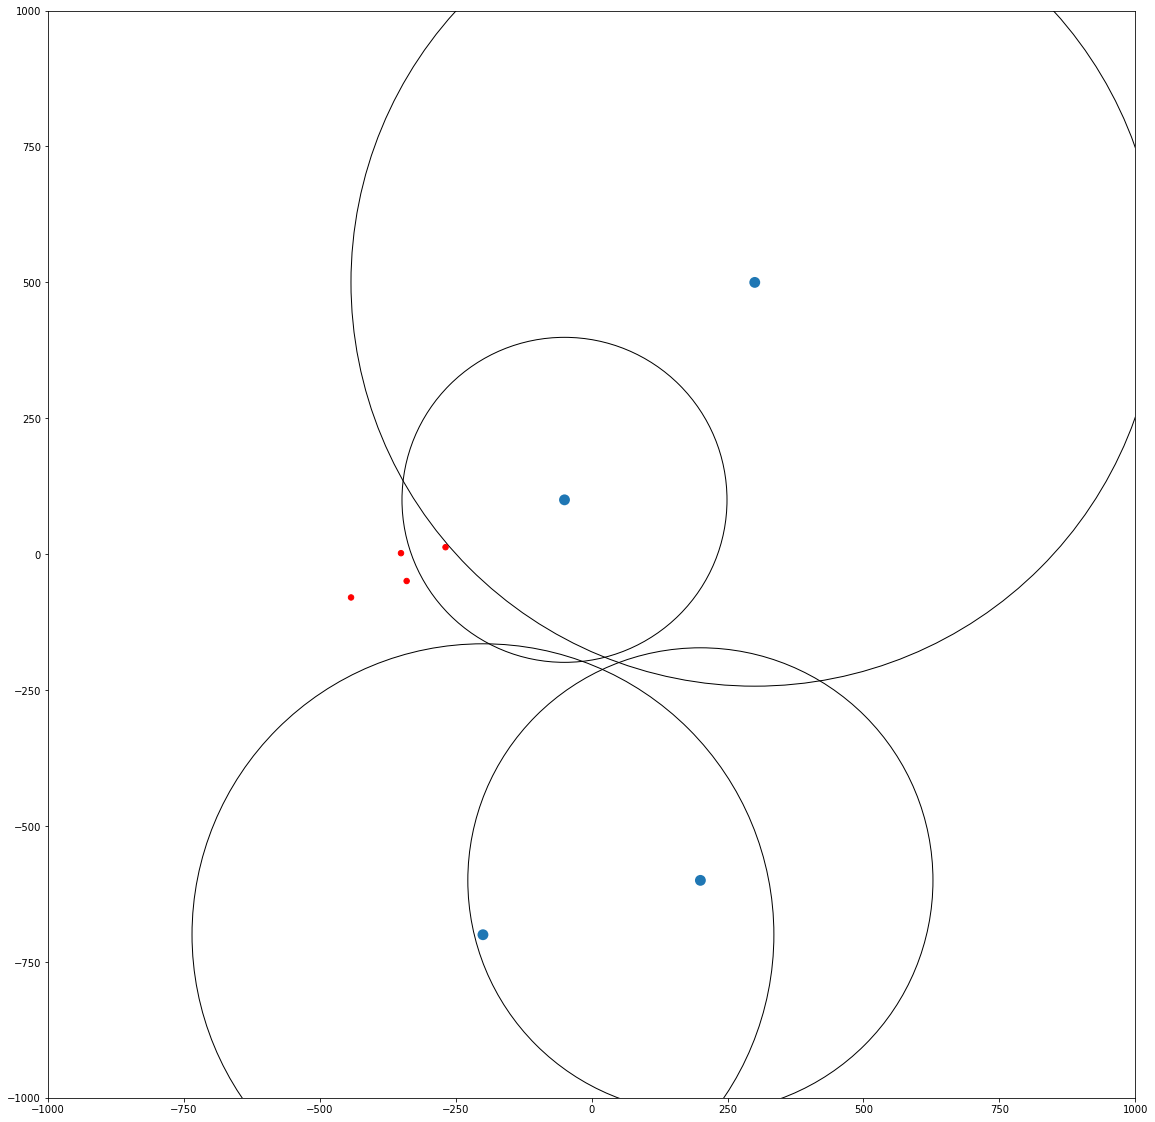

In [111]:
f, axes = plt.subplots()
f.set_figwidth(20)
f.set_figheight(20)

plt.xlim(-1000 , 1000 )
plt.ylim(-1000 , 1000 )
axes.set_aspect(1)

def calc_z(prob, dist, cords):
    x0, y0, tau = prob
    t = len(dist)
    z = np.zeros(t)
    for i in range(t):
        z[i] = dist[i] - np.sqrt((cords[i][0] - x0)**2 + (cords[i][1] - y0)**2)
    return z

x0,y0,tau = 0,0,1
prob = [x0, y0, tau]
dist = np.array([ 298.9468,742.7760, 535.1911,427.8247, 987.5056])
cords = [(-50, 100), (300, 500), (-200, -700), (200, -600), (50, 800)]

new = []
dist2,cords2 = [],[]
m_vec = []
for i in range(5):
    dist2,cords2=np.copy(dist),np.copy(cords)
    dist2,cords2=np.delete(dist2,i),np.delete(cords2,i,axis=0)

    #print(distt)#
    result = least_squares(calc_z, prob, args=(dist2, cords))
    m = result.x
    m_vec.append(m)
    print("Оценка координат приемника: (x0= {:.2f}, y0= {:.2f}, tau= {:.2f})".format(m[0], m[1], m[2]))
#print(cords2)

for i in range(len(dist)):
    x_c = cords2[i][0]
    y_c = cords2[i][1]
    cir = plt.Circle((x_c, y_c),dist2[i],fill = False )
    axes.add_artist(cir)
    axes.add_artist(plt.Circle((x_c, y_c), 10))
    axes.add_artist(plt.Circle((m_vec[i][0], m_vec[i][1]), 5,color='red'))
    #plt.Circle((m[0], m[1]), 20,color='red')

Оценка координат приемника: (x0= 23.37, y0= -197.40, tau= 1.00)


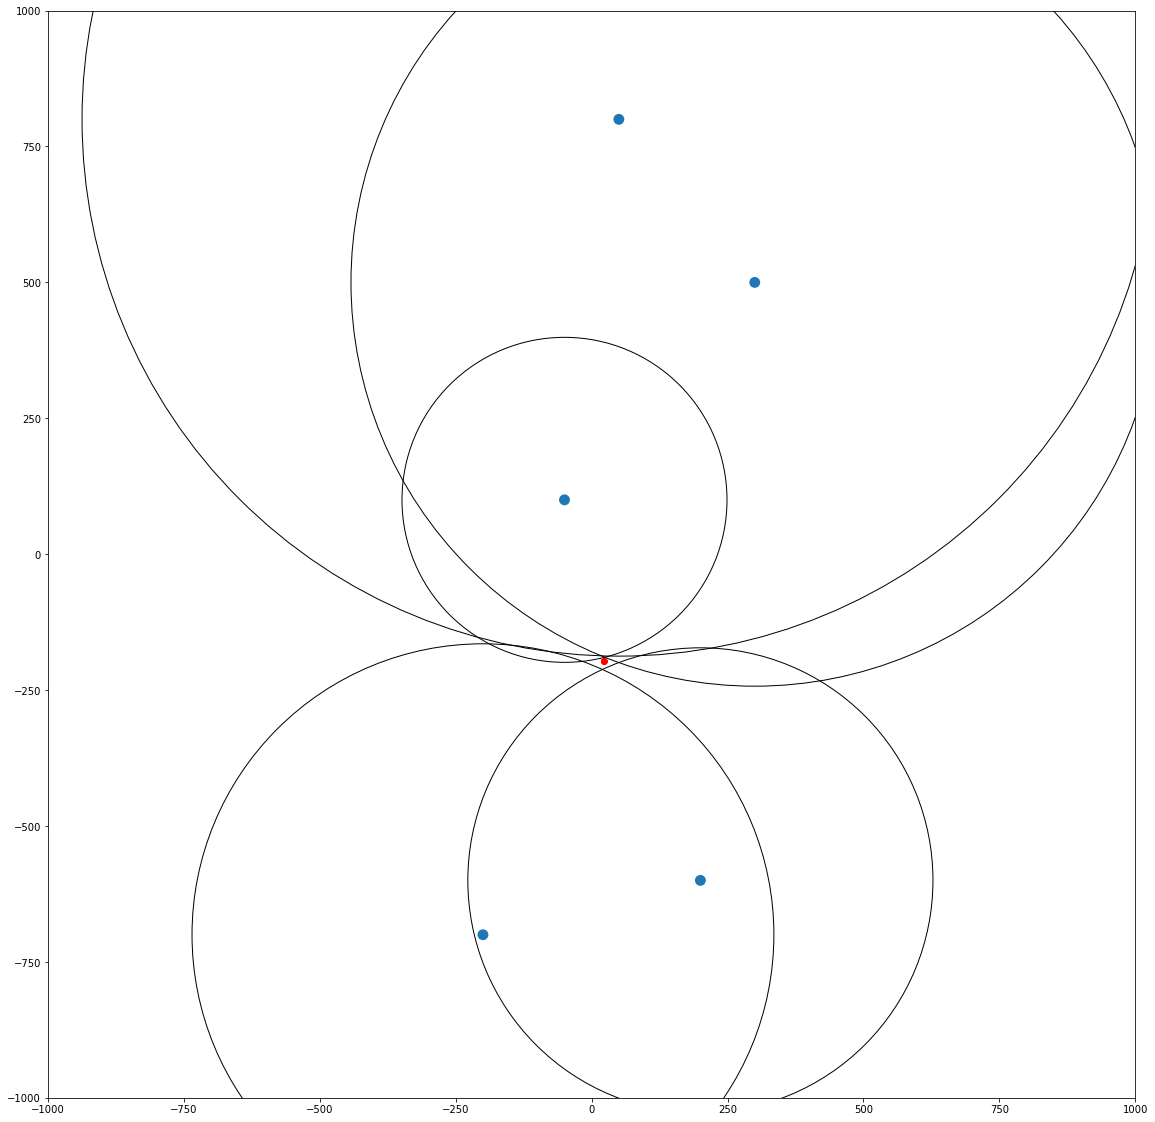

In [95]:
f, axes = plt.subplots()
f.set_figwidth(20)
f.set_figheight(20)

plt.xlim(-1000 , 1000 )
plt.ylim(-1000 , 1000 )
axes.set_aspect(1)
def calc_z(prob, dist, cords):
    x0, y0, tau = prob
    t = len(dist)
    z = np.zeros(t)
    for i in range(t):
        z[i] = dist[i] - np.sqrt((cords[i][0] - x0)**2 + (cords[i][1] - y0)**2)
    return z


x0,y0,tau = 0,0,1
prob = [x0, y0, tau]
dist = np.array([ 298.9468,742.7760, 535.1911,427.8247, 987.5056])
cords = [(-50, 100), (300, 500), (-200, -700), (200, -600), (50, 800)]


result = least_squares(calc_z, prob, args=(dist, cords))


m = result.x

print("Оценка координат приемника: (x0= {:.2f}, y0= {:.2f}, tau= {:.2f})".format(m[0], m[1], m[2]))

for i in range(len(dist)):
    x_c = cords[i][0]
    y_c = cords[i][1]
    cir = plt.Circle((x_c, y_c),dist[i],fill = False )
    axes.add_artist(cir)
    axes.add_artist(plt.Circle((x_c, y_c), 10))
    axes.add_artist(plt.Circle((m[0], m[1]), 5,color='red'))
    #plt.Circle((m[0], m[1]), 20,color='red')


# Дальше не работает, завтра разберусь

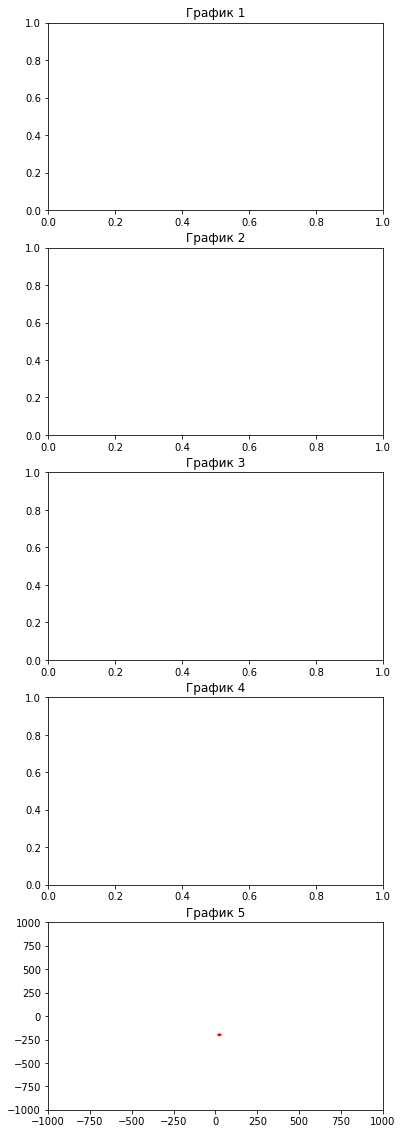

In [114]:
# Создание фигуры и осей
fig, axs = plt.subplots(5, 1, figsize=(6, 20))
plt.xlim(-1000 , 1000 )
plt.ylim(-1000 , 1000 )
# Итерация по каждой оси
for i, ax in enumerate(axs):
    # Построение графика для текущей оси
    ax.add_artist(plt.Circle((m_vec[i][0], m_vec[i][1]), 10,color='red'))

    # Установка заголовка для каждого графика
    ax.set_title('График {}'.format(i+1))


    # Показать графики
plt.show()
# Расположение графиков
#plt.tight_layout()

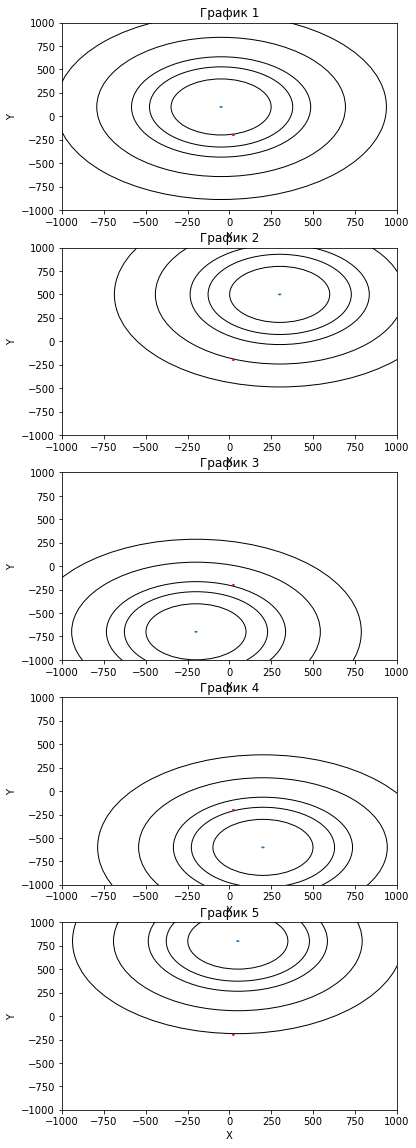

In [126]:
import matplotlib.pyplot as plt

# Создание фигуры и осей
fig, axs = plt.subplots(5, 1, figsize=(6, 20))

# Итерация по каждому графику
for i, ax in enumerate(axs):
    # Данные для круга
    x_c = cords[i][0]
    y_c = cords[i][1]
    dist_c = dist[i]

    # Построение круга на текущем графике
    for j in range(len(dist)):
    cir = plt.Circle((x_c, y_c), dist[j], fill=False)
    ax.add_artist(cir)

    # Добавление дополнительных элементов
    ax.add_artist(plt.Circle((x_c, y_c), 10))
    ax.add_artist(plt.Circle((m[0], m[1]), 5, color='red'))

    # Настройка пределов осей
    ax.set_xlim(-1000, 1000)
    ax.set_ylim(-1000, 1000)

    # Настройка меток осей
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Установка заголовка
    ax.set_title('График {}'.format(i+1))

# Показать графики
plt.show()
